In [7]:
import os
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from google.colab import drive
from collections import Counter

In [8]:
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/train_data/train.txt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Load the dataset
def load_data(dataset_path):
    data = []
    labels = []

    with open(dataset_path, "r", encoding="utf-8") as file:
        for line in file:
            parts = line.strip().split("\t")
            if len(parts) == 3:
                sentence1, sentence2, label = parts
                data.append(sentence1 + " " + sentence2)
                labels.append(int(label))

    return data, labels

# Text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub("\\d+", "", text)  # Remove numbers
    text = re.sub("\\s+", " ", text).strip()  # Remove extra spaces
    return text

# Load and preprocess data
texts, labels = load_data(dataset_path)
texts = [preprocess_text(text) for text in texts]

In [10]:
#  Check the class distribution
label_counts = Counter(labels)
print(f"Class distribution: {label_counts}")

Class distribution: Counter({0: 183966, 1: 183407})


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.7265
Testing Accuracy: 0.7052
Precision: 0.7058, Recall: 0.7052, F1-score: 0.7050
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     36795
           1       0.69      0.73      0.71     36680

    accuracy                           0.71     73475
   macro avg       0.71      0.71      0.71     73475
weighted avg       0.71      0.71      0.70     73475



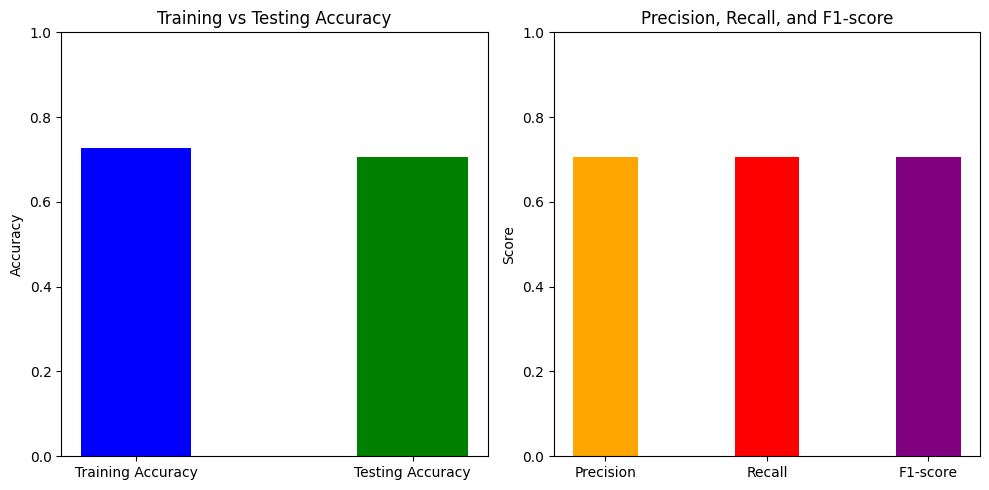

Result: Paraphrased


In [11]:
# At least two classes exist
if len(label_counts) < 2:
    print("Error: Dataset contains only one class. Model training skipped.")
else:
    # Split dataset for training
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

    # Extraction of feature
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Training simple linear model i.e., Logistic Regression
    model = LogisticRegression()
    history = model.fit(X_train_tfidf, y_train)

    # Evaluate of model
    y_pred = model.predict(X_test_tfidf)
    train_accuracy = model.score(X_train_tfidf, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # precision, recall, f1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # graph accuracy vs precision-recall
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.bar(["Training Accuracy", "Testing Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'green'], width=0.4)
    plt.ylim(0, 1)
    plt.ylabel("Accuracy")
    plt.title("Training vs Testing Accuracy")

    plt.subplot(1, 2, 2)
    plt.bar(["Precision", "Recall", "F1-score"], [precision, recall, f1], color=['orange', 'red', 'purple'], width=0.4)
    plt.ylim(0, 1)
    plt.ylabel("Score")
    plt.title("Precision, Recall, and F1-score")

    plt.tight_layout()
    plt.show()

    # Working demo
    def check_plagiarism(sentence1, sentence2):
        text = preprocess_text(sentence1 + " " + sentence2)
        text_tfidf = vectorizer.transform([text])
        prediction = model.predict(text_tfidf)[0]
        return "Paraphrased" if prediction == 1 else "Not Paraphrased"

    # Example
    test_sentence1 = "A person on a horse jumps over a broken down airplane."
    test_sentence2 = "A person is outdoors, on a horse."
    print(f"Result: {check_plagiarism(test_sentence1, test_sentence2)}")